In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('data/Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Data cleaning


In [133]:
#missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN



The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"


In [134]:
df.loc[:122,'Region'] = 0
df.loc[122:, 'Region'] = 1

In [135]:
df['Region'] = df['Region'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [136]:
#Remove null values
df = df.dropna().reset_index(drop=True) 
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [137]:
#row with second header
df.iloc[[122]]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [138]:
df = df.drop(122).reset_index(drop=True)

In [139]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [140]:
#fix spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Change reqd columns into integer data type

In [141]:
df[['day', 'month', 'year', 'Temperature', 'RH','Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH','Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


### Change other columns into float data type

In [142]:
objects = [feature for feature in df.columns if df[feature].dtypes=='O']

#convert all objects exept classes to float
for i in objects:
    if i != 'Classes':
        df[i]=df[i].astype(float)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [144]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [145]:
#Store the cleaned dataset
df.to_csv('data/Algerian_forest_fires_cleaned_dataset.csv', index=False)

### Exploratory Data Analysis

In [146]:
#drop unnecesary columns
df_copy = df.drop(['day', 'month', 'year'], axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [147]:
#Check value counts
print(df_copy['Classes'].value_counts()) 

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


In [148]:
#Encoding of Classes into categories and remove extra spaces and converting to lowercase
df_copy['Classes'] = df_copy['Classes'].apply(lambda x: 0 if x.strip().lower()=='not fire' else 1 )
df_copy.head()
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

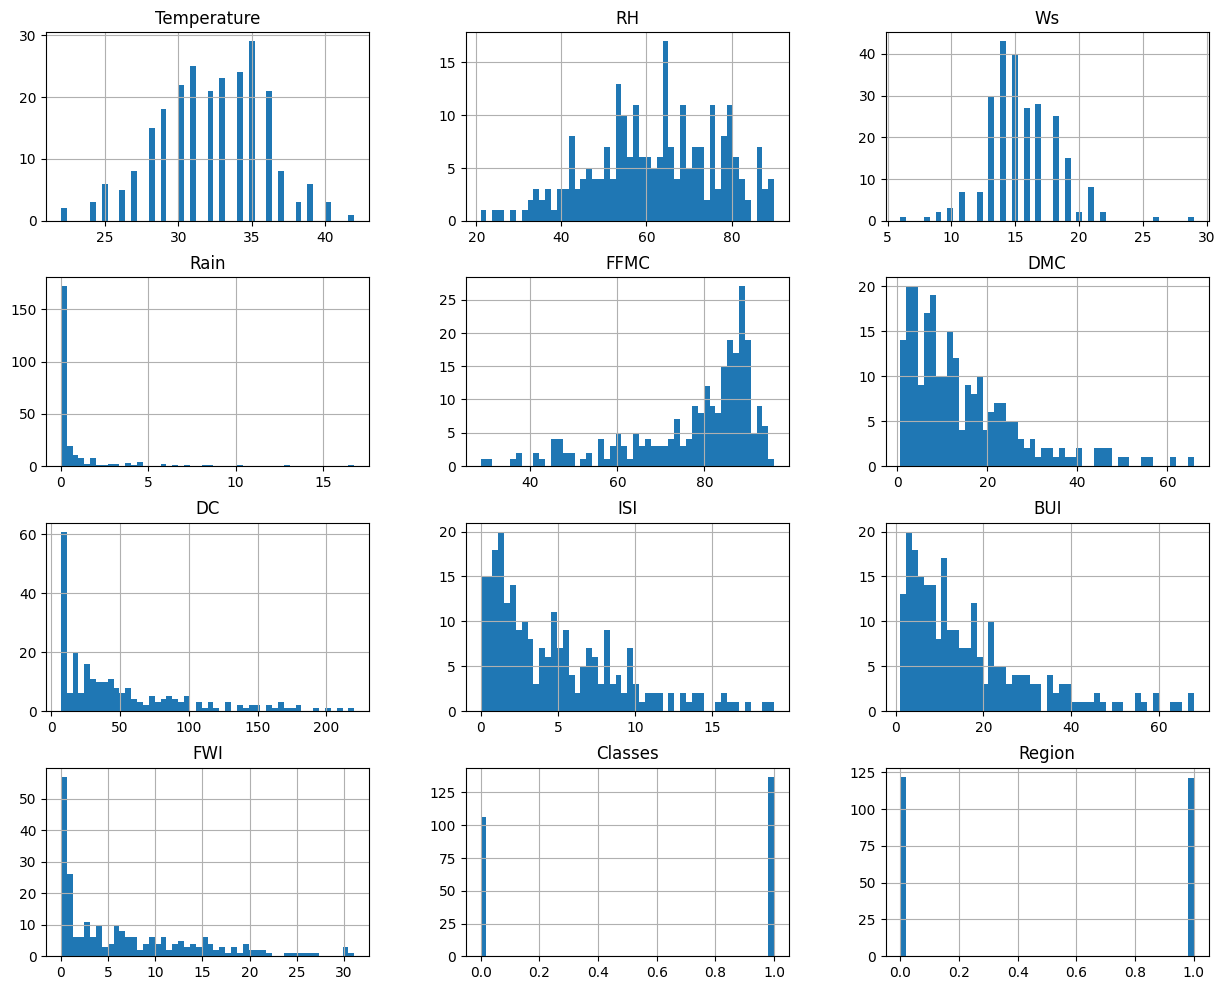

In [149]:
#plot density plot for all features
df_copy.hist(bins=50, figsize=(15,12))
plt.show()

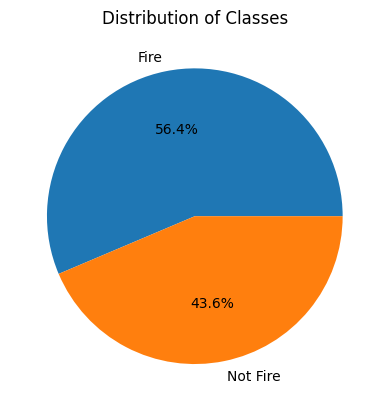

In [150]:
#percentage of pie chart for Classes category
classes_count = df_copy['Classes'].value_counts()
labels = ['Fire', 'Not Fire']
plt.pie(classes_count, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.show()

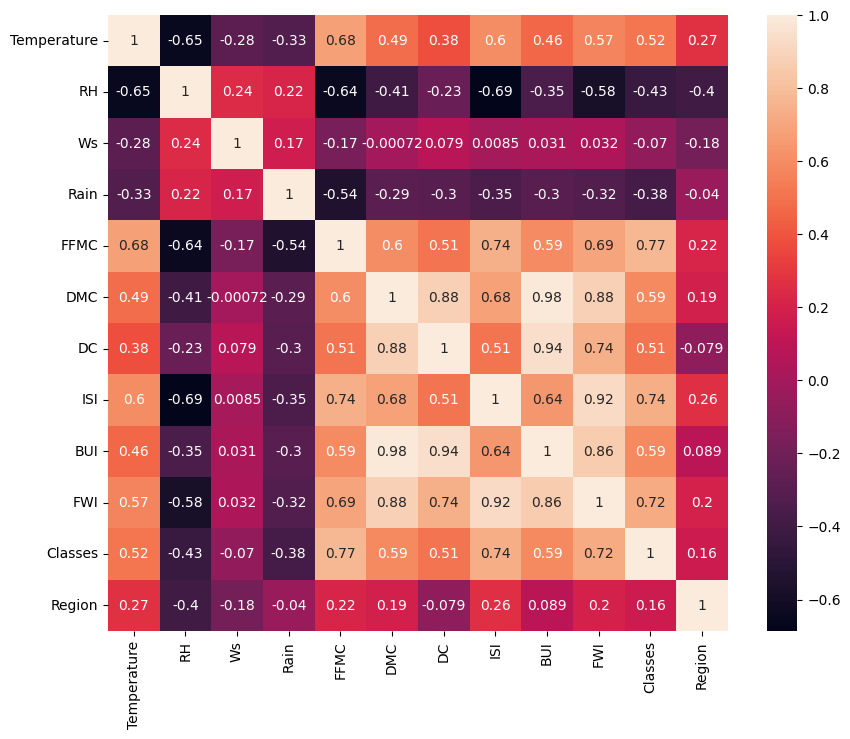

In [151]:
#Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

<Axes: ylabel='FWI'>

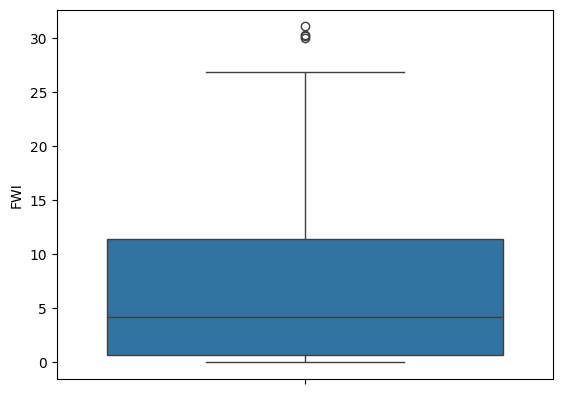

In [152]:
## Box plots
sns.boxplot(df['FWI'])

<Axes: xlabel='month', ylabel='count'>

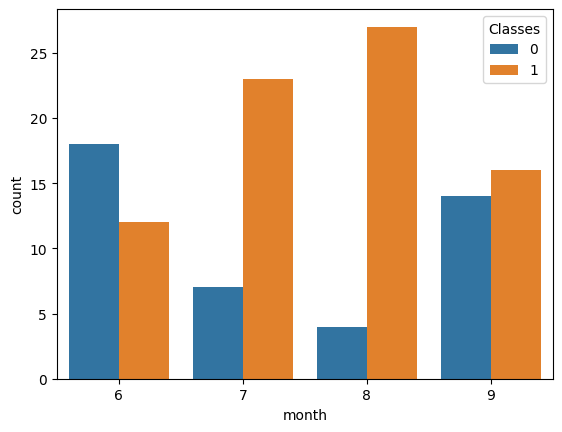

In [153]:
#Conversion for df dataset
df['Classes'] = df['Classes'].apply(lambda x: 0 if x.strip().lower()=='not fire' else 1 )

#Monthly fire analysis
dftemp = df.loc[df['Region']==1]
sns.countplot(x='month', hue='Classes', data=dftemp)

Text(0, 0.5, 'Months')

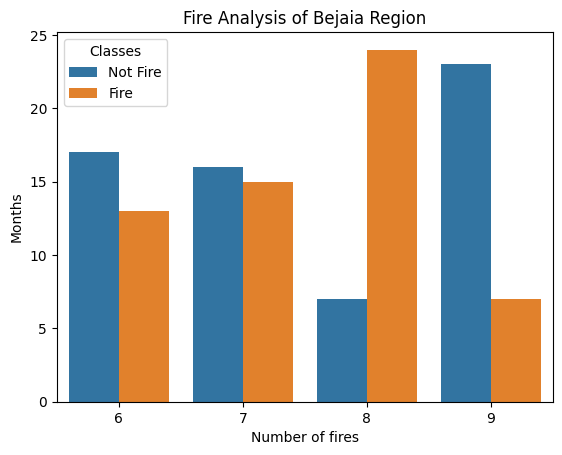

In [154]:

#Monthly fire analysis
dftemp = df.loc[df['Region']==0]
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.legend(title='Classes', labels=['Not Fire','Fire'])
plt.title('Fire Analysis of Bejaia Region')
plt.xlabel('Number of fires')
plt.ylabel('Months')

Text(0, 0.5, 'Months')

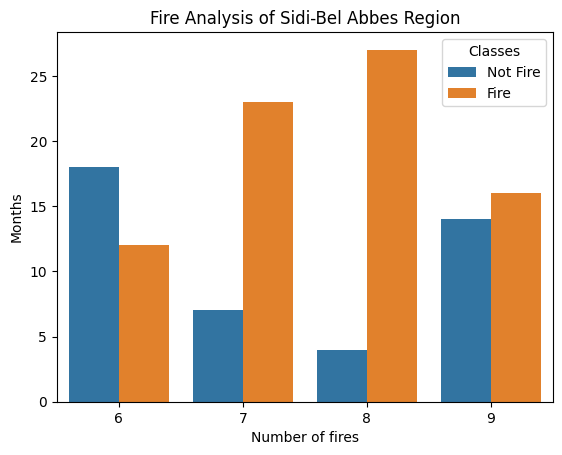

In [155]:

#Monthly fire analysis
dftemp = df.loc[df['Region']==1]
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.legend(title='Classes', labels=['Not Fire','Fire'])
plt.title('Fire Analysis of Sidi-Bel Abbes Region')
plt.xlabel('Number of fires')
plt.ylabel('Months')

It is observed that both regions observed most number of fires in July and August.

Less fires in June and September.
